# TAREA

## Integración Montecarlo

1. Realizar las siguientes integrales. Poner los resultados en una tabla cuyas filas correspondan a la cantidad de términos utilizados en la aproximación (usar 10, 100, 1000, 10000 y 100000 términos) y cuyas columnas correspondan a las funciones.
    + $\int_{1}^{3} e^{x}\log(x)\text{d}x$.
    + $\int_1^3 \sin(x)\ln(x) \text{d}x$

In [1]:
import numpy as np
import pandas as pd

def f(x):
    return(np.exp(x))
N = 100000
u = np.random.uniform(3, 1, N)
np.mean(f(u))*(3-1)

17.37190137203096

In [5]:
def montecarlo(f, N, a, b):
    u = np.random.uniform(a, b, N)
    return np.mean(f(u))*(b-a) 

In [7]:
table = pd.DataFrame(columns = ["Aproximación", "Error"], index = N)
table

,Aproximación,Error
10.0,NaN,NaN
100.0,NaN,NaN
1000.0,NaN,NaN
10000.0,NaN,NaN
100000.0,NaN,NaN


In [8]:
N = np.logspace(1, 5, 5)
for i in N : 
    print (i)
a = 1
b = 3

for i in N : 
    aprox = montecarlo(f, int(i), a , b)
    table.loc[i, "Aproximación"] = aprox
    table.loc[i, "Error"] = (17.3382) - aprox
table

10.0
100.0
1000.0
10000.0
100000.0


,Aproximación,Error
10.0,12.634712,4.703488
100.0,16.75705,0.58115
1000.0,17.237894,0.100306
10000.0,17.496501,-0.158301
100000.0,17.426328,-0.088128


In [10]:
import sympy as sp
def f(x):
    return(np.sin(x)*np.log10(x))
N = 100000
u = np.random.uniform(3,1, N)
np.mean(f(u))*(3-1)

0.37736173487703417

In [11]:
N = np.logspace(1, 5, 5)
for i in N : 
    print (i)
a = 1
b = 3

for i in N : 
    aprox = montecarlo(f, int(i), a , b)
    table.loc[i, "Aproximación"] = aprox
    table.loc[i, "Error"] = (0.37736) - aprox
table

10.0
100.0
1000.0
10000.0
100000.0


,Aproximación,Error
10.0,0.406543,-0.029183
100.0,0.408538,-0.031178
1000.0,0.366871,0.010489
10000.0,0.377556,-0.000196
100000.0,0.378289,-0.000929


2. Aproximar el área de la región descrita por

$$x^2+2y^2\leq-2x+8y-7$$

Poner los resultados en una tabla cuyas filas correspondan a la cantidad de términos utilizados en la aproximación (usar 10, 100, 1000, 10000 y 100000 términos) y en las columnas el valor de aproximación y el error relativo.

Definir unos límites adecuados $a_1$, $b_1$, $a_2$ y $b_2$, para la región $R=\left[a_1,b_1\right]\times\left[a_2,b_2\right]$

In [2]:
import random
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

In [3]:
def f(x,y):
    return ((x)**2 + 2*(y)**2) <= (-2*x + 8*y - 7)

In [4]:
#CORREGÍ EL RANGO DEL 0 AL 3
x = np.random.uniform(-3, 1, 100)
y = np.random.uniform(0, 3, 100)
X, Y = np.meshgrid(x, y)

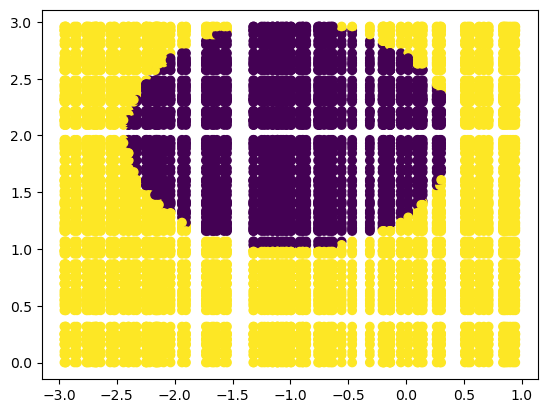

In [5]:
plt.figure()
plt.scatter(X,Y, c =~ f(X, Y))

In [6]:
N = np.logspace(1, 5, 5)
table = pd.DataFrame(columns = ["Aproximación"], index = N)
table

,Aproximación
10.0,NaN
100.0,NaN
1000.0,NaN
10000.0,NaN
100000.0,NaN


In [7]:
def montecarlo2 (region, ax, bx, ay, by, N):
    x = np.random.uniform(ax,bx, N)
    y = np.random.uniform(ay,by, N)
    B = region (x,y)
    Ar = (bx-ax)*(by-ay)
    return np.mean(B)*Ar

In [8]:
montecarlo2 (f, -3, 1, 0, 3, 10000)

4.4376

In [9]:
#hice el error relativo
for i in N : 
    aprox = montecarlo2(f, -3, 1, 0, 3,int(i))
    table.loc[i,"Aproximación"] =  aprox
    table.loc[i,"Error"] =  (4.3464) - aprox
table

,Aproximación,Error
10.0,4.8,-0.45360
100.0,4.44,-0.09360
1000.0,4.38,-0.03360
10000.0,4.4148,-0.06840
100000.0,4.45788,-0.11148


3. Describe 3 casos de uso de integración Montecarlo en tu ingeniería.

- Simulación de precios de activos: El método de integración Montecarlo nos puede ayudar a ver como va variando el precio de la acción y esto lo podemos obtener como un cambio porcentual día a día o tal cual en moneda. De esta manera puedes darte una idea si es conveniente o no invertir en ese activo. 

- Análisis de riesgo: El método de integración Montecarlo se puede utilizar para realizar análisis de riesgo en portafolios de inversión, ya que es posible obtener el riegso que existe en ellos al simular el comportamiento de los precios a futuro. 

- Valoración de opciones: El método de integración Montecarlo también podría servir para valorar opciones. Como mencioné en el ejemplo anterior, podemos simular los precios, en este caso se puede hacer lo mismo, pero con el precio de un activo en específico, de esta manera se puede calcular aproxiadamente el valor de la opción.